# Statistical analysis of chaotic systems

---

# 1 Introduction. Statistical analysis of chaotic systems

We shall study systems, whose time evolution for short time is uniquely determined. It can be given by a set of differential equations or functions describing the change from one time step to the next one. These are called deterministic dynamical systems. Many of them show regular motion (periodic motion or composition of periodic motions), e.g. the motion of a planet, oscillators with linear coupling, vibrations of a solid.
Many others show irregular motion, which seems to be random at least on a large time-scale: the Galton Board, irregular motion of gas particles or Brownian motion in a fluid etc.
At this point we can say the behavior is called chaotic, if it is totally deterministic (which is seen in the short time scale), but is irregular, random-like for long time scale.
Exact definition will be given later.

The last examples are related to the foundation of statistical physics. As usually, we represent the state of the system by a point in the phase space. As it follows the change of the state of the system a trajectory is formed. Theorems of statistical physics assume a closed system with many degrees of freedom behaves such that the point in the phase space visits uniformly the energy shell when followed for long time. By energy shall we can think of a region whose points correspond to energies between $E$ and $E+\delta E$ with a sufficiently small $\delta E$. The trajectory visits it uniformly in the sense, that the time it spends in a certain region of the energy surface is proportional to the corresponding volume of the energy shell. Consequently, the average of a function $f(\mathbf{p}, \mathbf{q})$ for a long time period can be approximated by the space average of $f$ in the energy shell.
In the limit of infinite time this yields:
- ergodicity: the infinite-time average of a function along the trajectory is equal to the space average calculated with the use of the density; or in equation form
$$\lim_{T\rightarrow\infty}\frac{1}{T}\int_0^T f(\mathbf{p}(t),\mathbf{q}(t)) dt =
\int_{R^n} f(\mathbf{p},\mathbf{q}) \rho(\mathbf{p}, \mathbf{q}) d\mathbf{p}d\mathbf{q}\;,$$
where $\rho(\mathbf{p},\mathbf{q})$ is the probability density. This density can be approximated by a function which is only nonzero in the energy shell with constant value $1/V([E,E+\delta E])$. 

Immediately arise the questions, which are the main points of this lecture,
- Is the large number of degrees of freedom necessary to ergodicity and chaos?
- How can the behaviour of ergodic systems be described statistically?

In order to turn to the statistical description it is necessary to talk about the main features of chaotic systems and their classification. First of all, the emergence of chaotic behavior and its alternation with ordered behavior takes place differently in the two main class of systems, namely in
- conservative systems
- dissipative systems

# 2.1 Types of behavior in conservative systems

By conservative system we usually think of a Hamiltonian system with time independent Hamiltonian function. This practically means, that the energy of the system is constant and the laws of motion do not contain time directly.
Just a reminder: in this case by Liouville's theorem the phase space volume of a region is kept while their points evolve in time.

We shall see that typical systems can be classified into these three types
- integrable
- mixed phase space
- fully chaotic

In order to create demonstrative figures the functions in the following cell shall be used.
Readers are not expected to run that cell, except if they want to rerun the later code cells.

In [1]:
%pylab inline
from scipy.integrate import *

def planet(x,t):
    r3=(x[0]**2+x[1]**2)**pl_exp
    return [x[2],x[3],-999*x[0]/r3,-999*x[1]/r3]

def planet2d(p_exp,tt,nt,v0r):
    global pl_exp
    pl_exp=p_exp
    t=linspace(0,tt,nt)  # give necessary time values
    v0=2*pi*150/365.25 /v0r
    q0=[150,0,0,v0]         # initial condition
    q=odeint(planet,q0,t)   # solving the equations
    plot(q[:,0],q[:,1],0,0,"or")
    xlabel('x')
    ylabel('y')

# from plotly import *
from mpl_toolkits.mplot3d import *

def planet3d(p_exp,tt,nt,v0r):
    global pl_exp
    pl_exp=p_exp
    t=linspace(0,tt,nt)  # give necessary time values
    v0=2*pi*150/365.25 /v0r
    q0=[150,0,0,v0]         # initial condition
    q=odeint(planet,q0,t)   # solving the equations
    vr=(q[:,0]*q[:,2]+q[:,1]*q[:,3])/sqrt(q[:,0]**2+q[:,1]**2)
    ax=subplot(1,1,1,projection='3d') #térbeli koordinátatengely létrehozása
    ax.plot(q[:,0],q[:,1],vr)
    ax.set_xlim([-200, 200])
    ax.set_ylim([-200, 200])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('v_r',labelpad=0)

def HenonHeilescontours():
    x,y = meshgrid(linspace(-1.1,1.1,51),linspace(-0.6,1,49))
    la=1
    V = x**2/2 +y**2/2 + la*x**2*y -la*y**3/3
    cs=contour(x,y,V,levels=[0.001,0.002,0.005,0.01,0.02,0.03,0.05,0.1,0.14,1/6,0.2,0.3,0.5,1])
    clabel(cs)
    axis("equal")
    xlabel('x')
    ylabel('y')

Populating the interactive namespace from numpy and matplotlib


## 2.2 Integrable systems

Integrability is first theoretically formulated here. Readers may prefer to look through the demonstrative examples first and then return here.

**Theory briefly:**
We consider a system with $N$ degrees of freedom described by Hamiltonian
$H(\mathbf{p},\mathbf{q})$, $\mathbf{p}=(p_1,p_2,\ldots,p_N)$, $\mathbf{q}=(q_1,q_2,\ldots,q_N)$.

In the case when just N constants of motion exist it is possible to make a canonical transformation to new variables
$\mathbf{I}=(I_1,I_2,\ldots,I_N)$, $\mathbf{\Phi}=(\Phi_1,\Phi_2,\ldots,\Phi_N)$ such, that the new Hamiltonian does not depend on the $\Phi_i$ variables, only on the $I_i$ ones, i.e. there exist a transformation

$$H(\mathbf{p},\mathbf{q})\rightarrow H(\mathbf{I},\mathbf{\Phi})\equiv H(\mathbf{I})\;.\;\;\;\;\;\;\;\;\;\;\;\;\;\;    (1) $$

The new variables are called generalized action and angle variables.
$I_i$ can be the constants of motion, or quantities related to them. The Hamiltonian equations written for the new Hamiltonian ensure that $I_i$ are really constant and they also describe the evolution of the new angles as 
$$d\Phi_i/dt=\omega_i(\mathbf{I})\rightarrow\Phi_i(t)=\Phi_i(0)+\omega_i t\;, \;\;\;\;\;\;\;\;  (2) $$
where $\omega_i$ are deteremined by $H(\mathbf{I})$.

From these follows, that the original variables depend on time as 
$$ q_i=f_i(\Phi)=f_i(\omega_1 t,\omega_2 t,\ldots\omega_N t),$$
$$ p_i=g_i(\Phi)=g_i(\omega_1 t,\omega_2 t,\ldots\omega_N t),$$
where the functions $f_i,g_i$ are periodic in each argument,
and $(\mathbf{p},\mathbf{q})$ moves on a closed curve or on an n-torus in the phase space.
The resulting time dependence is called quasiperiodic.

**Demonstrative example**: Let us study the motion of a point mass in the gravitational field of another mass! (E.g.  an asteroid in the solar system when neglecting the effect of the planets, or a spaceship returning from Mars). Typical motions (with energy less then enough to escape) are periodic.

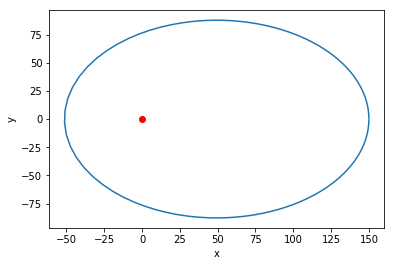

In [2]:
planet2d(1.5,200,100,1.4)

This was a special case: the orbit closes because the period of circulation and the period of the radial oscillation are equal.

More typical motion in Hamiltonian systems can be seen after a change in the potential (even a small change in the exponent of the potential)

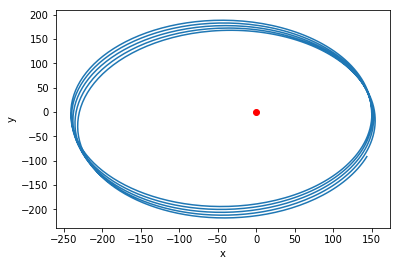

In [3]:
planet2d(1.52,3000,1000,1.0)

When following the trajectory longer it seems to fill a region in space

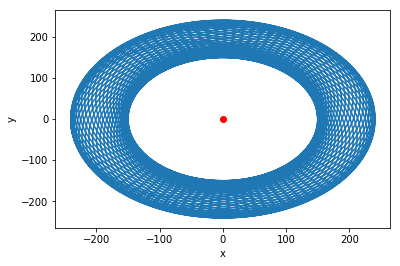

In [4]:
planet2d(1.52,30000,10000,1.0)

We want to describe the motion in the phase space, which is 4 dimensional. However, due to the conservation of energy, the trajectory moves on the constant energy surface, which is 3 dimensional. That surface can be represented, e.g. by the variables x,y and the radial component of the velocity. That is enough, since by these values and the energy the perpendicular component of the velocity is determined.
In this 3D space we see motion on a torus, which is composition of two periodic motions.

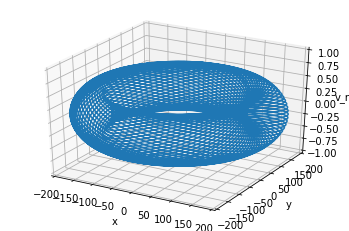

In [5]:
planet3d(1.52,30000,10000,1.0)

The position on the torus can be described by angles $\phi_1, \phi_2$ measured along a loop in a vertical plane and another one along a loop in a vertical crossecsion. These angles correspond to $\Phi_1, \Phi_2$, though not equal to them. Due to Eq.(2) the relative frequency of the horizontal and vertical turnings is determined by the ratio $\omega_2/\omega_1$ of the angular frequencies, called twisting number.
Its rational approximations give time instants with closer and closer return to the initial point.
By mathematical theorems any number can be approximated with arbitrary precision $\delta$ such that $\omega_2/\omega_1 = (n_2+\delta)/n_1$ with large enough $n_1$. Then it follows that in the time while $n_1$ turnings are done in the first angle the other angle changes by $\omega_2 \cdot n_1\frac{2\pi}{\omega_1} = 2\pi\cdot(n_2+\delta_2)$,
i.e. the point on the torus returns to the initial position with precision in order of $\delta$.
For this reason such time dependence is called quasiperiodic.



### Poincaré section

Poincaré section or Poincaré mapping is a method which simplifies the investigation of the system. Intersecting the phase space by a well chosen plane (or other smooth surface) can intersect the trajectory infinite times.
The periodic, quasiperiodic, chaotic nature of the trajectory can be determined by the crossing ponts, as well.
On the other hand there is a functional relationship between a crossing point and the next one, since by solving the equations of motion the next crossing can be found, i.e.

$\mathbf{P}_{k+1}=\mathbf{F}(\mathbf{P}_k)$

If we knew the function simply iterating this equation the system can be simulated in dimension decreased by one. This can rarely be done in realistic systems, but it is often a way of defining a model. Even if we do not have the functional form of the map, and do not use a model map, displaying the system is easier in the decreased dimensions.

In general, in an $n$ dimensional phase space the intersection can be done with an $n-1$ dimensional surface, leading to an $(n-1)$-variate function.

In the Poincaré section each tori are drawn as closed curves. This way it is easier to study different initial conditions. The usually give different curves in the sections, which often surround each other, as in case of our centric potential.

![Poincaré map](figs/poinct.gif)

## 2.3 Mixed phase space

The case of mixed phase space can be well seen in another well known example, in the Hénon–Heiles system.
That describes the motion of a point mass in the potential
$$V(x,y) = \frac{1}{2}(x^2+y^2)+\lambda\left(x^2y-\frac{y^3}{3}\right)$$

Near the origin it corresponds to two independent oscillators, and with increasing distance from the origin there is an increasing perturbation (with $120^\circ$ rotational symmetry). (Note, thereby increasing the energy has the same effect as increasing lambda.)

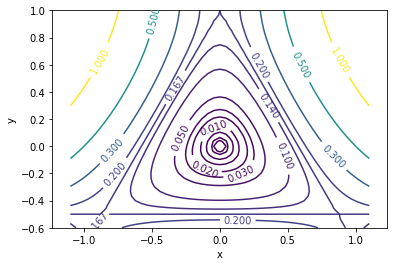

In [6]:
HenonHeilescontours()

In Poincaré section it seem, that the phase space is partly filled with tori. Studying the trajectories in the rest  of the phase space (the region with scattered dots) one can see chaotic motion. This is why such phase space structure is called the case of mixed phase space. Furthermore, in more detailed investigation it turns out, that inside the tori there are narrow regions with chaotic motion and in the chaotic see there are small 'island' containing tori.

![](figs/SurfaceOfSection_800.gif) E=1/8

(Wolfram MathWorld)

Let us turn now to the parameter dependence. For small energies chaotic regions are practically not seen. When the energy or $\lambda$ is increased chaotic bands appear, their proportion increaes and they merge. Finally the chaotic behaviour becomes dominant.

<img src="figs/HenonHeiles_850.gif" alt="drawing" width="1080"/>(Wolfram MathWorld￼)

In this other series of plots the curves of the tori are less well seen, but the regions are more clearly identified: chaotic ones appear in gray and the ordered ones in other colours.
(Note, here $h$ denotes the energy):
![](figs/11071_2014_1766_Fig7_HTML.gif)(Springer￼)

### Lyapunov instability

Let us study how the distance of two nearby trajectories increases in time!
In case of an integrable system the initial conditions of the two trajectories can be on different, but nearby tori. 
Thereby they can circulate in the angle variables with slightly different speed. This leads to a roughly linearly increasing distance. However, in chaotic systems the distance increases typically exponentially,
$$\Delta x(t)\propto e^{\lambda t}\;.$$
<img src="figs/776px-LyapunovExponentFig1.png" alt="Drawing" style="width: 450px;"/>(Scholarpedia)
Why this is so, will become clear in the study of one-dimensional maps.
The exponent, the so-called Lyapunov exponent can be red off from the time dependence of $\alpha_t=\Delta x(t)$  as the slope of the line fitted to $\log(\Delta x(t))$ in function of $t$.
In the mathematical definition the limit of infinitely small initial distance is used to obtain the exponent as
$$\lambda=\lim_{t\rightarrow\infty}\frac{1}{t}\lim_{\Delta x(0)\rightarrow 0}\log\frac{\Delta x(t)}{\Delta x(0)}$$

One very important consequence is, that chaotic systems are predictable only for short times. The initial state of a system can generally be measured with a finite precision, thereby the initial state of the predicted motion differs from that of the true one. Another source of uncertainty is the a possible finite precision of the equations of motion, which causes deviation of the true and predicted motion in already a short time interval. In both cases the deviation increases exponentially and the prediction will be meaningless in a relatively short time.
This phenomena is called sensitivity to initial conditions. Besides the unordered nature of trajectories this is the mean criterion of chaos.

Thereby one can briefly say a system is chaotic if $\lambda>0$. It has to be noted that the motion is also required to be bounded, otherwise simple unstable systems would be classified as chaotic (e.g. the system defined by equation $\dot x = x$).

## 2.4 Fully chaotic systems

There are dynamical systems which do not have tori with regular motion. Examples of these are easier to find among the special kind of Hamiltonian systems, the billiard systems. In these systems a point particle moves between hard walls with fully elastic reflection. Inside the billiard the potential energy is constant, so the particle makes free motion there (unless there is a magnetic field). The figures below show two simple cases, the stadion billiard (or Bunimovich stadium) and the Sinai billiard. Sinai billiard was the first dynamical system, in which ergodicity, chaos was mathematically proven.
The figures also refer to the fact, that using the symmetry properties of the region (a square billiard with a centrically positioned reflective circle) the motion is equivalent to the billiard seen in the last figure.
Therefore the billiards with the two shapes are equally called Sinai billiard.

![HH](figs/billiards.gif)

## 2.5 Classification of billiard systems

Billiards, as specified in the previous section form a special class of Hamiltonian systems.
In this class we have the same three types of systems, as among the general Hamiltonian ones:

- integrable: A trivial example is the circle biliard, due to the regular nature of the consecutive reflections (or by the conservation of the angular momentum). Not so trivial, but the elliptical billiard also has a second constant of motion (beyond the energy), thereby it is integrable, too.
- mixed phase space: The lense shape biliard, and oval billiards typically show mixed phase space.
- fully chaotic: e.g. the above mentioned stadion and Sinai billiard.

![HH](figs/ell-len.gif)

## 2.6 Dissipative systems

In contrast to conservative systems, the volume of phase space regions is decreased in time. This makes it possible, what is generally seen in dissipative systems, that some objects attract trajectories from a neighborhood. This neighborhood (called basin of attraction) can be the full phase space or a part of it. Such objects are called attractors. They can be of the following types:
- stable fixed point: a point, which is not moved by the equations of motion, and is attractive
- stable periodic orbit: a trajectory which is a closed curve and attractive
- stable n-torus: a torus which is densely visited by a trajectory, and attractive
- strange attractor: an attractor that shows chaotic behavior and fractal structure (to be discussed later)

![](figs/attractors.gif)

<img src="figs/Lorenz_attractor.svg" alt="Drawing" style="width: 500px;"/>
<center> Lorenz attractor (Wikipedia) </center>

You may visit this link to see how the chaotic motion takes place on a strange attractor:
[A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor_(Wikipedia)](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)

As a consequence of the attraction the long-time behaviour of the system does not depend where exactly the trajectory started inside this basin of attraction. The decay of the distance from the attractor typically decays exponentially, thereby the typical behavior sets in relatively soon.
However, it is not at all rare, that a system has more than one attractor at the same time, even of different kind.
Then the initial condition determines which attractor is reached, thereby which behavior is shown by the system.

Using the method of Poincaré section is also useful in dissipative systems. Due to the reduction of the dimensionality it simplifies the representation of the state of the system, and possibly the calculation of the evolution, as well. This usually decreases the dimension of the attractor.
- a fixed point remains a fixed point if the Poincaré surface goes through it (exceptionally the dimensionality is not changed)
- a periodic orbit will be seen as a fixed point or a periodically visited series of points in the map
- strange attractor will be represented by its crossection retaining its chaotic and fractal properties with one smaller dimension

Due to the above facts numerous properties of chaotic systems can be well studied by
two-dimensional models of such Poincaré maps. A much studied 2D map is the Hénon model
$$ x_{k+1} = 1-ax_k^2+y_k\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; $$
$$ y_{k+1} = by_k\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; $$

The long time behavior shows a chaotic attractor with well seen fractal nature.
![H](figs/HenonMap.svg.png)(Wikipedia)

The mapping function can be decomposed into three steps, which are well seen
[here. (Wikipedia)](https://upload.wikimedia.org/wikipedia/commons/0/06/Henon_map.gif)

### Stretching and folding
The above presentation shows repeated stretching and folding in the time evolution. This is a very important feature of chaotic systems. It is general, continuously present in every chaotic systems, both in conservative and dissipative ones. It is even observable in the forthcoming 1D maps, which apply a simplified descriptioin of higher dimensional chaotic systems. More uniquely will be seen this mechanism in baker's map, see later.

## 2.7 One-dimensional maps

We need further function for the rest of the demonstrations. It is not necessary to run them, except in case of need to rerun the later code cells.

In [7]:
def maps1d():
    figsize(7,2)
    x=linspace(0,1,100)
    subplot(1,3,1)
    xlabel('tent map')
    plot(x,1-abs(2*x-1))
    y=mod(2*x,1)
    subplot(1,3,2)
    xlabel('Bernoulli shift')
    plot(x/2,x,x/2+1/2,x,'b')
    subplot(1,3,3)
    xlabel('logistic map')
    plot(x,4*x*(1-x))

def loghist(x,n):
    xs=[x]
    for i in range(n):
        x=4*x*(1-x)
        xs.append(x)
    figsize(4,4)
    hist(xs,100); xlabel('x'); ylabel('n')

def map1do():
    figsize(2,2)
    x=linspace(0,1,100)
    xlabel('open tent map')
    plot(x/3,x,1-x/3,x,'b')

def baker(x,y):
    s=2.001
    if x<1/s: return s*x,  y/3
    else:   return 1-1/(1-1/s)*(1-x),(y+2)/3

def bakerplot(w='xy'):
    x,y=sqrt(2)/5,sqrt(2)/3
    xl=[x]; yl=[y]
    for i in range(100000):
        x,y=baker(x,y)
        xl.append(x); yl.append(y)
    if w=='xy': plot(xl,yl,'.',ms=1); xlabel('x'); ylabel('y');
    if w=='y': hist(yl,arange(244)/243); xlabel('y'); title('distribution')
    if w=='yc': hist(yl,arange(244)/243,cumulative=True); xlabel('y'); title('cumulative dist')

#for i in range(100): plot(i/100,baker(i/100,1/2)[0],'.')

In many systems the dissipation is so strong that a phase space region that surrounds an attractor in its basin of attraction becomes thin in relatively short time. Consequently the attractor is also thin (see e.g. the figure of the Lorenz attractor above). Its intersection with the Poincaré surface can be approximated by one or very few curved sections. The state of the system on such curved segments can be described by one variable, and the Poincaré map can be given using this coordinate as
$$x_{k+1}=f(x_k)\;.$$

Some of the simplest models are these

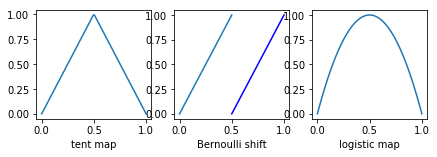

In [8]:
maps1d()

tent map:
$\;\;f(x)=\left\{\begin{array}{l}
2x,\;\;      \mbox{if}\;\; x<1/2\\
2(1-x),\;\;  \mbox{if}\;\; x>1/2
\end{array}\right.$

Bernoulli shift*:
$\;\;f(x)=\left\{\begin{array}{l}
2x,\;\;      \mbox{if}\;\; x<1/2\\
2x-1,\;\;  \mbox{if}\;\; x>1/2
\end{array}\right.$

logistic map:
$\;\;f(x) = r x (1-x)$, fully developed case: $r=4$


Geometrically the time evolution can be worked out as follows. We start with a value $x_0$ from the $x$ axis. Then get the next $x$ value as $f(x)$ by the graph of $f$; and project the result to the $axis. Repeat these two steps as many times as needed.

Notice that the one-dimensional maps preserve the general featurs of chaos: streching and folding.
Streching is seen as nearby trajectories are separated by the rate given by the slope of the map, which is bigger than one in modulus in the above examples (at least in average). That is necessary for the positive Lyapunov exponent. Folding is realised, since pairs of points are mapped to the same point. And this folding is necessary, otherwise the streching would infinitely magnify any small interval of the system.

Introduction of maps is also possible by other ways than the strong dissipation limit.
Some phenomena can be formulated directly in dicrete-time phenomena.

One example of population dynamics describes the evolution of number of rabbits on an island.
It is assumed their number in a year is determined by the number in the previous year.
For small number there is planty of food, thereby $n_{k+1}\approx r n_k$.
With increasing number they can get less food and the function curves down.
Such a function is realized by just the above mentioned logistic map when introducing $x=n/N$ with a suitable $N$.

Two-dimensional maps can be introduced similarly, e.g. by taking into acount two species: rabbits and foxes.
Then the evolutions can be described as

$$x_{t+1}=f(x_t,y_t)$$
$$y_{t+1}=g(x_t,y_t)$$

One-dimensional maps have the advantage, that the Lyapunov exponent is easier to calculate.
The direct definition reads
$$\lambda=\lim_{t\rightarrow\infty}\frac{1}{t}\lim_{\Delta x(0)\rightarrow 0}\log\frac{\Delta x(t)}{\Delta x(0)}\;.$$

Since here $x_t=f(f(...f(x_0)...))=f^{(t)}(x_0)$,
by the chain rule the derivative becomes the product of the values of $|f'(x_k)|$, finally
$$\lambda=\lim_{t\rightarrow\infty}\frac{1}{t}\sum_{k=0}^{t-1}\log |f'(x_k)|\;.$$

As an example $\lambda$ comes out promptly for both the above mentioned tent map and the Bernoulli shift, in which $|f'(x)|=2$ and we get $\lambda=\log(2)$.

---

## 3.1 Probability density

After a large number of iterations one can get an information from thy system by studying the distribution of the $x$ values, e.g. plotting it by a histogram. In typical systems this takes the same shape for different number of iterations and for different typical initial points (until they belong to the same basin of attraction.
As an example, the histogram is shown here for the logistic map at $r=4.

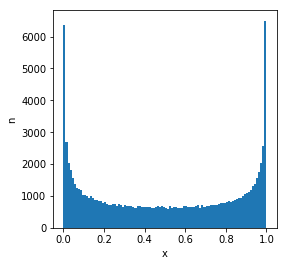

In [9]:
loghist(0.2,100000)

The question arises how can we get the probability density $p(x)$?

First we shall write down how the density of initial points is transformed by one iterations, then write down the condition when it is unchanged.

Evolution under one step can be written down with the help of the figure: ![](figs/fp.gif)

The density obtained at each point is determined by the densities at the preimages $z$ and the corresponding value of the slope of the map as
$$p_0(x)\rightarrow p_1(x)=\sum_{z:f(z)=x}\frac{p(z)}{f'(z)}=\hat F p_0(x)$$

Observing that the result is a linear funtion of $p_0(x)$ one can construct the operator of the evolutioin $\hat F$ (called Frobenius-Perron operator) in the above sum form, or equivalently in the following
integral form:
$$\hat F p(x)=\int_I p(z)\delta(f(z)-x) dz\;.$$

Here $I$ denotes the interval on which the mapping acts.

The distribution obtained from many iterations of one initial point in the limit of infinite time corresponds to the distribution which is invariant under action of $\hat F$. This statement can be easily accepted, since the iterate if the density approximated by the set of points $x_0,x_1,\ldots x_{t-1}$ is approximated by the set $x_1,x_2,\ldots x_t$. Thereby the distribution obtained in the long time limit is expected to be equal to the invariant distributioin $p(x)$ defined by
$$\hat F p(x)=p(x)$$

In other words $p(x)$ is the eigenfunction of $\hat F$ with $\lambda_1=1$. By further considerations this should be the leading eigenfunction.

The above examples, the tent map and the Bernoulli shift are again trivial in the sense, that for them
$p(x)\equiv 1\;.$

## 3.2 Using the density: averaging and calculating the Lyapunov exponent

Average of a function $A(x)$ of the position can be calculated in two ways
$$\langle A\rangle = lim_{t\rightarrow\infty}\frac{1}{t}\sum_{k=0}^{t-1} A(x_k) = \int_I A(x)p(x) dx$$

**Consequence**<br>
$\lambda=\lim_{t\rightarrow\infty}\frac{1}{t}\sum_{k=0}^{t-1}\log |f'(x_k)|$ considered as an average of $A(x)=\log(|f'(x)|)$<br>
yields
$$\lambda=\int_I \log(|f'(x)|) p(x) dx$$


## 3.3 Conjugation

Change of variable $y=h(x)$, with a differentiable monotonic function at all time instants (e.g. diameter or mass of drops from a tap):<br>
$y_{k+1}=h(x_{k+1})$, $x_{k+1}=f(x_k)$ and $x_k=h^{(-1)}(y_k)$

the conjugated map becomes
$$y_{k+1}=g(y_k)\;\;\mbox{with}\;\;g(y)=h(f(h^{(-1)}(y)))$$

- density of points is transformed by $h(x)$:
$$p^{(g)}(y)=\frac{p(h^{(-1)}(y))}{h'(h^{(-1)}(y))}$$

- Lyapunov exponent is unchanged

e.g. the tent map (at $r=4$) is conjugated to the logistic map by $h(x)=\sin^2(2x/\pi)$, thereby $\lambda_{\rm logistic}=\log(2)$


## 3.4 Long time evolution

Clearly $p_k(x)=\hat F^k p_0(x)$

Assuming $\lambda_2<\lambda_1=1$ for $\hat F$ and $p_0(x)=c p(x)+c_2 p^{(2)}(x)$
$$p_k(x)=\lambda_1^k c p(x)+\lambda_2^k c_2 p^{(2)}(x)$$

convergence to $p(x)$ is exponential with decay rate
$\lambda_2$  (with decay rate $\lambda_2/\lambda_1$ in some generalizations)

This governs correlations, too<br>

$$\langle\, (x_t-\langle x\rangle) \cdot (x_0-\langle x\rangle) \,\rangle \sim \lambda_2^t \;\;\;\; \mbox{for} \;\;\;\; t\rightarrow\infty$$

$$\langle\, (A(x_t)-\langle A\rangle) \cdot (A(x_0)-\langle A\rangle) \,\rangle \sim \lambda_2^t \;\;\;\; \mbox{for} \;\;\;\; t\rightarrow\infty$$

## 3.5 Two-dimensional models

- They show the structure of the attractor of more realistic (3D) dissipative systems in crossection.

e.g. Baker's map
![](figs/baker.gif)
(width=1/2 gives the conservative case)

Repeated iteration leads to a fractal structure.

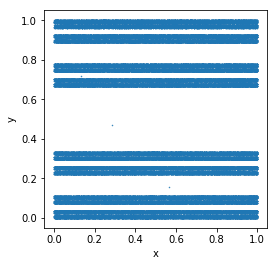

In [10]:
bakerplot('xy')

Projection onto y

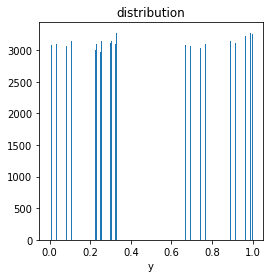

In [11]:
bakerplot('y')

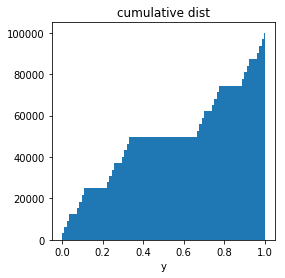

In [12]:
bakerplot('yc')

## 3.6 Fractal description

### Box counting dimension:
covering a set by boxes of size $\varepsilon$

Interval: $N(\varepsilon)\approx l/\varepsilon$

2D area: $N(\varepsilon)\approx A/\varepsilon^2$

generalization: $N(\varepsilon)\approx A/\varepsilon^D$<br>
i.e.
$$D=\lim_{\varepsilon\rightarrow 0}\frac{\log(N(\varepsilon))}{-\log(\varepsilon)}$$

e.g. for the Baker map with band thickness $a$
> $\varepsilon=a^k$, $\;\;N=2^k\;\;$ --> $\;\; D=\frac{\log(2)}{-\log(a)}$

Note: there is a generalization, the one-parameter family of generalized dimensions (Rényi dimensions) $D_q$,
from which $D_0=D$.

## 3.7 Open systems, transient chaos

![](figs/disks.gif)

1D models:


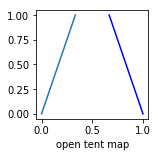

In [13]:
map1do()

Long living trajectories form the repeller: fractal (Cantor-set) structure

Fractal dimension for the tent map on [0,a],[1-a,1]: $\;\; D=\frac{\log(2)}{-\log(a)}$
